In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../paduaq/')
sys.path.append('../qslam/')
from padua import padua_points, padua_points_set, padua_order
from visualiserisk import HEATMAP, cm2inch

from pdinter_MM import pd_interpolant, calc_padua_cgl
from true_functions import true_function, generate_data_qubits_coords

from pdpoints import *
from pdweights import reproducing_kernel_v2, fundamental_L_B_v2, Tn_

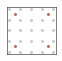

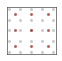

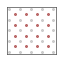

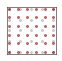

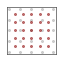

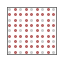

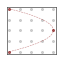

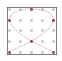

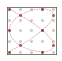

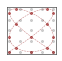

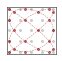

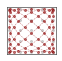

In [19]:
regular_grid_list = [-4, -5, -3, -6, -7, -2, 1, 2, 3, 4, 5, 10]
data_qubit_num = 25
data_qubit_flag ='uniform'




idxorder=0
for padua_order in regular_grid_list:
    
    fig = plt.figure(figsize=(cm2inch(2.2),cm2inch(2.2)))
    
    ########################
    # Generate Sensing Qubits
    ########################
    
    #
    if padua_order > 0:
        sensing_qubits = calc_padua_cgl(padua_order)[0]
    

    # No data-qubits, basic analysis

    if padua_order == -1: 
        sensing_qubits = generate_data_qubits_coords(data_qubit_num,
                                              flag=data_qubit_flag)

    # Sensor-qubits in regular (non-Padua) formation

    if padua_order == -2:
        FINEGRID = 81
        sensing_qubits = generate_data_qubits_coords(FINEGRID, flag=data_qubit_flag)

    if padua_order == -3:
        COARSEGRID = 16
        sensing_qubits = generate_data_qubits_coords(COARSEGRID, flag=data_qubit_flag)

        # Re-position grid inside square region
        sensing_qubits = list(np.asarray(sensing_qubits) * 0.75)

    if padua_order == -4:
        REG4 = 4
        sensing_qubits = generate_data_qubits_coords(REG4, flag=data_qubit_flag)
        sensing_qubits = list(np.asarray(sensing_qubits) * 0.75)

    if padua_order == -5:
        REG9 = 9
        sensing_qubits = generate_data_qubits_coords(REG9, flag=data_qubit_flag)
        sensing_qubits = list(np.asarray(sensing_qubits) * 0.75)

    if padua_order == -6:
        REG36 = 36
        sensing_qubits = generate_data_qubits_coords(REG36, flag=data_qubit_flag)
        
    
    if padua_order == -7:
        # specific grid to address random polynomial functionality
        sensing_qubits = generate_data_qubits_coords(25, flag=data_qubit_flag)
        sensing_qubits = list(np.asarray(sensing_qubits)*0.75)
    
    ########################
    # Generate Data Qubits
    ########################
        
    if padua_order > 0:
        data_qubits = generate_data_qubits_coords(data_qubit_num, flag=data_qubit_flag)

    if padua_order == -1: 
        data_qubits = None
        
    if padua_order == -2:
        data_qubits = generate_data_qubits_coords(data_qubit_num, flag=data_qubit_flag)
        
        # remove duplicate sensors:
        sensing_qubits = list(set(sensing_qubits) - set(data_qubits))

    if padua_order <= -3:
        data_qubits = generate_data_qubits_coords(data_qubit_num, flag=data_qubit_flag)


    plt.subplot(111) #len(regular_grid_list), idxorder + 1)
    plt.ylim([-1.1,1.1])
    plt.xlim([-1.1,1.1])
    
   
    # Overlay data grid
    if data_qubits is not None:
        data_qubits = np.asarray(data_qubits)
        plt.plot(data_qubits[:,0], data_qubits[:,1], '.', 
                 markeredgecolor='darkgrey', 
                 markerfacecolor='darkgrey',
                 label="Data Qubits", ms=4, alpha=0.5)

    # Calculated padua points
    sensing_qubits = np.asarray(sensing_qubits)
    plt.plot(sensing_qubits[:,0], sensing_qubits[:,1], '.', 
             markeredgecolor='darkred', 
             markerfacecolor='darkred',
             label="Sensor Qubits", ms=4, alpha=0.5)
        
    if padua_order > 0:
        t = np.linspace(0, np.pi, 200)
        x_curve, y_curve = generating_curve(padua_order, t)
        plt.plot(x_curve, y_curve, '--', label="Gen. Curve", 
             lw=0.5, c='darkred', alpha=0.5)

    #plt.tick_params(labelleft=False, labelbottom=False)
    plt.xticks([])
    plt.yticks([])
    
    idxorder+=1

    plt.savefig('./data_figs/regular_set_'+str(padua_order)+'.svg', format='svg', dpi=800)
    plt.show()

# Padua Points

All methods validate that the Padua points can be calculated correctly via ideal theory approach, and transformed generating curve approach.


## Plot and test padua points and generating curve

In [3]:
'''
Validation for Python functions:
    Ideal Theory: generate_padua_points()
    Generating Curve: transform_points(calc_padua_points())
'''

'\nValidation for Python functions:\n    Ideal Theory: generate_padua_points()\n    Generating Curve: transform_points(calc_padua_points())\n'

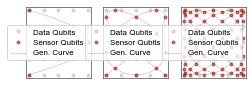

In [4]:
t = np.linspace(0, np.pi, 200)
x = np.linspace(-1, 1, 5)
X, Y = np.meshgrid(x,x)

fig = plt.figure(figsize=(cm2inch(10),cm2inch(3.3)))
padua_order_list= [1, 4, 10]

idxorder=0
for order in padua_order_list:
    
    paduas = calc_padua_points(order)[0]
    # paduas_c = padua_points_set(order) 
    paduas_2 = generate_padua_points(order)
    
    plt.subplot(1, len(padua_order_list), idxorder + 1)
    plt.ylim([-1.1,1.1])
    plt.xlim([-1.1,1.1])
    
   
    # Overlay data grid
    plt.plot(X.flatten(), Y.flatten(), 'o', 
             markeredgecolor='lightgrey', 
             markerfacecolor='lightgrey',
             label="Data Qubits", ms=3, alpha=1.)
    
    # Calculated padua points
    plt.plot(paduas_2[:,0], paduas_2[:,1], 'o', 
             markeredgecolor='darkred', 
             markerfacecolor='darkred',
             label="Sensor Qubits", ms=3, alpha=0.5)
    
    
    # Generating curve
    x_curve, y_curve = generating_curve(order, t)
    plt.plot(x_curve, y_curve, '--', label="Gen. Curve", 
             lw=0.5, c='darkred', alpha=0.5) # global rotation (-1) and reflection
        
    plt.legend(loc=0, fontsize=8)
        

    #plt.tick_params(labelleft=False, labelbottom=False)
    plt.xticks([])
    plt.yticks([])
    
    idxorder+=1

plt.savefig('./data_figs/padua_set.svg', format='svg', dpi=800)
plt.show()

# All Grids


In [5]:
data_qubits

array([[-1. , -1. ],
       [-0.5, -1. ],
       [ 0. , -1. ],
       [ 0.5, -1. ],
       [ 1. , -1. ],
       [-1. , -0.5],
       [-0.5, -0.5],
       [ 0. , -0.5],
       [ 0.5, -0.5],
       [ 1. , -0.5],
       [-1. ,  0. ],
       [-0.5,  0. ],
       [ 0. ,  0. ],
       [ 0.5,  0. ],
       [ 1. ,  0. ],
       [-1. ,  0.5],
       [-0.5,  0.5],
       [ 0. ,  0.5],
       [ 0.5,  0.5],
       [ 1. ,  0.5],
       [-1. ,  1. ],
       [-0.5,  1. ],
       [ 0. ,  1. ],
       [ 0.5,  1. ],
       [ 1. ,  1. ]])